In [2]:
#dependencies

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



In [4]:
#https://www.kaggle.com/code/imtkaggleteam/7-clustering-algorithm-mental-health/input
df_world_health = pd.read_csv("files/mental-illnesses-prevalence.csv")
df_world_health.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815


In [5]:
#https://www.kaggle.com/datasets/michellevp/predicting-anxiety-in-mental-health-data?resource=download&select=healthanxiety_dataset.csv
df_anxiety = pd.read_csv("files/healthanxiety_dataset.csv")
df_anxiety.head()   

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,healthanxiety,Nomis176,1/1/2018,"Final doctor appointment tomorrow, tired of co...",9.137909,7.282428,8.616061,72.474091,61.090909,11.345455,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.055919
1,healthanxiety,psychstudent317,1/1/2018,Anyone have bone or muscle pain that was stres...,4.399892,7.131386,3.665806,87.185376,74.161290,5.423656,...,0.0,0.0,0.0,0.000000,0.290466,0.0,0.0,0.000000,0.0,0.000000
2,healthanxiety,bulk_barn,1/1/2018,Listening to your body? I'm curious how those ...,3.590660,4.930895,4.605802,85.640967,72.584906,7.564151,...,0.0,0.0,0.0,0.110757,0.000000,0.0,0.0,0.332673,0.0,0.000000
3,healthanxiety,AutoModerator,1/1/2018,Weekly /r/HealthAnxiety Challenge - Exercise A...,4.515682,7.033342,5.059091,78.383636,72.863636,8.945455,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
4,healthanxiety,parthkhurana7,1/1/2018,This is killing me So i had a bacterial stomac...,3.034388,5.356252,3.977494,85.306958,76.721519,7.757637,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [6]:
#https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students
df_student_survey = pd.read_csv("files/C_19_Stu_SR.csv")
df_student_survey.head()    


,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
0,R1,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,R2,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,R3,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling
3,R4,Delhi-NCR,20,3.0,Very poor,Smartphone,2.0,1.0,6.0,5.0,Instagram,0,3,Decreased,NO,Watching web series,NO,NO,"Friends , relatives"
4,R5,Delhi-NCR,21,3.0,Good,Laptop/Desktop,3.0,1.0,8.0,3.0,Instagram,1,4,Remain Constant,NO,Social Media,NO,NO,Travelling


In [ ]:
#https://www.tableau.com/learn/articles/free-public-data-sets

In [31]:
#https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset
df_main = pd.read_csv("files/Mental-Health-Dataset.csv")
df_main.tail(30)    


df_main_timesorted = df_main.sort_values(by='Timestamp', ascending=True)
df_main_timesorted.head(5)



,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
17416,10/2/2014 21:25,Female,United States,Others,No,Yes,Yes,1-14 days,Maybe,Maybe,Maybe,Medium,No,Yes,Maybe,No,Not sure
40769,10/2/2014 21:25,Female,United States,Housewife,No,Yes,Yes,More than 2 months,Maybe,Maybe,No,High,No,No,Maybe,No,Not sure
40648,10/2/2014 21:25,Female,United States,Housewife,No,Yes,Yes,1-14 days,Maybe,Yes,Yes,Medium,No,No,Yes,No,Not sure
7252,10/2/2014 21:25,Female,United States,Housewife,No,Yes,Yes,Go out Every day,Yes,No,No,High,No,Maybe,No,No,Not sure
40527,10/2/2014 21:25,Female,United States,Housewife,No,Yes,Yes,1-14 days,Yes,Maybe,Maybe,High,Yes,Maybe,No,No,Not sure


In [37]:

df_organized = pd.DataFrame(df_main_timesorted)

# Regular expression to match and remove the time part
df_organized['Timestamp'] = df_organized['Timestamp'].str.replace(r'\s+\d{1,2}:\d{2}$', '', regex=True)

df_organized.head(5)

# Convert to datetime format
df_organized['Timestamp'] = pd.to_datetime(df_organized['Timestamp'], format='%m/%d/%Y')

# Sort by date
df_organized = df_organized.sort_values(by='Timestamp')

#save file to csv
df_organized.to_csv("files/Mental-Health-Dataset_timesorted.csv", index=False)


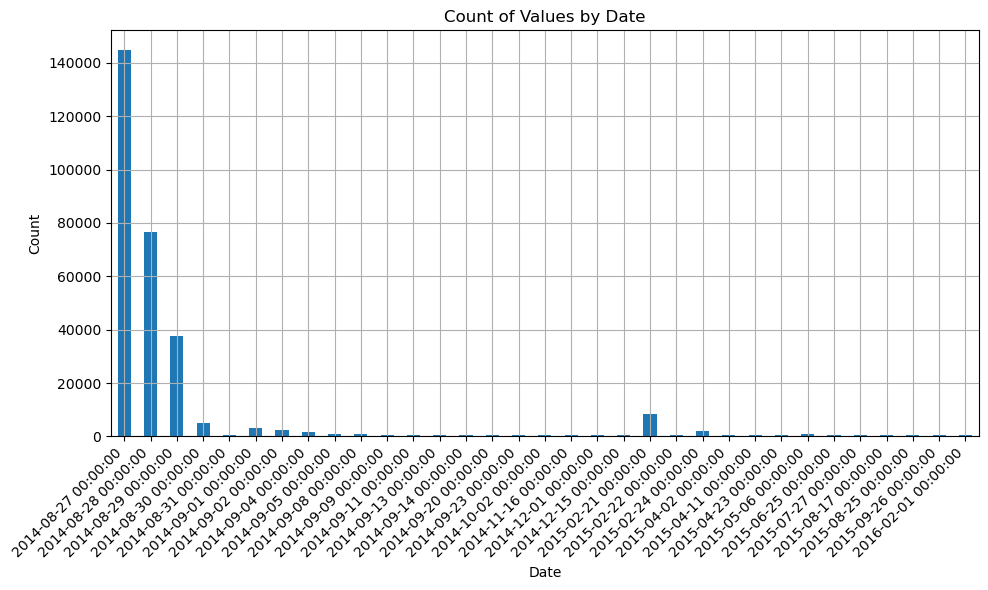

In [45]:
date_counts = df_organized['Timestamp'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.title('Count of Values by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.xticks(ha='right')
plt.tight_layout()

In [21]:
df_new = pd.DataFrame(df_main)
df_new['Country'] = df_new['Country'].str.strip().str.lower()
df_new = df_new['Country'].value_counts()

print(f"Number of unique Countries: {df_new.count()}")
df_new.head(10)

df_main()




Number of unique Countries: 35


Country
united states     171308
united kingdom     51404
canada             18726
australia           6026
netherlands         5894
ireland             5548
germany             4680
sweden              2818
india               2774
france              2340
Name: count, dtype: int64

In [34]:

df_new_wh = pd.DataFrame(df_world_health)

df_new_wh['Entity'] = df_new_wh['Entity'].str.strip().str.lower()
df_new_wh = df_new_wh['Entity'].value_counts()      

# duplicates = df_new_wh.duplicated(subset=["Entity", "Year"], keep=False)
  

print(f"Number of unique Countries: {df_new_wh.count()}")
df_world_health.head(10)



Number of unique Countries: 214


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
5,afghanistan,AFG,1995,0.219409,4.978228,4.668100,0.699768,0.108507
6,afghanistan,AFG,1996,0.218465,4.981489,4.665759,0.699650,0.105269
7,afghanistan,AFG,1997,0.217286,4.987593,4.665013,0.699597,0.101531
8,afghanistan,AFG,1998,0.216074,4.996858,4.668240,0.699765,0.098050
9,afghanistan,AFG,1999,0.215068,5.004257,4.673557,0.700054,0.095723


In [38]:
#world happiness data WIP
#reading and writing data from csv

df_happy_15 = pd.read_csv("whr/WHR_2015.csv")
df_happy_16 = pd.read_csv("whr/WHR_2016.csv")
df_happy_17 = pd.read_csv("whr/WHR_2017.csv")  
df_happy_18 = pd.read_csv("whr/WHR_2018.csv")   
df_happy_19 = pd.read_csv("whr/WHR_2019.csv")   
df_happy_20 = pd.read_csv("whr/WHR_2020.csv")   
df_happy_21 = pd.read_csv("whr/WHR_2021.csv")   
df_happy_22 = pd.read_csv("whr/WHR_2022.csv")   
df_happy_23 = pd.read_csv("whr/WHR_2023.csv")   


In [58]:
#data exploration 
#use code below to check the data

# df_happy_15.head()
# df_happy_16.head()
# df_happy_17.head()
# df_happy_18.head()
# df_happy_19.head()
# df_happy_20.head()
# df_happy_21.head()
# df_happy_22.head()
# df_happy_23.head()

# df_happy_15.describe()
# df_happy_16.describe()
# df_happy_17.describe()
# df_happy_18.describe()
# df_happy_19.describe()
# df_happy_20.describe()
# df_happy_21.describe()
# df_happy_22.describe()
# df_happy_23.describe()

df_happy_15.info()
# df_happy_16.info()
# df_happy_17.info()
# df_happy_18.info()
# df_happy_19.info()
# df_happy_20.info()
# df_happy_21.info()
# df_happy_22.info()
# df_happy_23.info()

# df_happy_15.columns
# df_happy_16.columns
# df_happy_17.columns
# df_happy_18.columns
# df_happy_19.columns
# df_happy_20.columns
# df_happy_21.columns
# df_happy_22.columns
# df_happy_23.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       158 non-null    object 
 1   region                        158 non-null    object 
 2   happiness_score               158 non-null    float64
 3   gdp_per_capita                158 non-null    float64
 4   social_support                158 non-null    float64
 5   healthy_life_expectancy       158 non-null    float64
 6   freedom_to_make_life_choices  158 non-null    float64
 7   generosity                    158 non-null    float64
 8   perceptions_of_corruption     158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 11.2+ KB


In [55]:
#checking for missing values
# df_happy_15.isnull().sum() #no missing values
# df_happy_16.isnull().sum() #no missing values
# df_happy_17.isnull().sum() #no missing values
# df_happy_18.isnull().sum() #has missing values
# df_happy_19.isnull().sum() #no missing values
# df_happy_20.isnull().sum() #no missing values
# df_happy_21.isnull().sum() #no missing values
# df_happy_22.isnull().sum() #no missing values
# df_happy_23.isnull().sum() #has missing values



country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [ ]:
#drop nulls in 2018 and 2023
df_happy_18 = df_happy_18.dropna()
df_happy_23 = df_happy_23.dropna()



In [60]:
#add year column to each dataframe
df_happy_15['Year'] = 2015
df_happy_16['Year'] = 2016
df_happy_17['Year'] = 2017
df_happy_18['Year'] = 2018
df_happy_19['Year'] = 2019
df_happy_20['Year'] = 2020
df_happy_21['Year'] = 2021
df_happy_22['Year'] = 2022
df_happy_23['Year'] = 2023




In [61]:
#preview data with year included
df_happy_15.head()


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [62]:
#merge all dataframes around the year column
df_happy = pd.concat([df_happy_15, df_happy_16, df_happy_17, df_happy_18, df_happy_19, df_happy_20, df_happy_21, df_happy_22, df_happy_23], axis=0)
df_happy = df_happy.dropna()
df_happy.describe()
df_happy.info()
df_happy.head(10)




<class 'pandas.core.frame.DataFrame'>
Index: 315 entries, 0 to 156
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       315 non-null    object 
 1   region                        315 non-null    object 
 2   happiness_score               315 non-null    float64
 3   gdp_per_capita                315 non-null    float64
 4   social_support                315 non-null    float64
 5   healthy_life_expectancy       315 non-null    float64
 6   freedom_to_make_life_choices  315 non-null    float64
 7   generosity                    315 non-null    float64
 8   perceptions_of_corruption     315 non-null    float64
 9   Year                          315 non-null    float64
dtypes: float64(8), object(2)
memory usage: 27.1+ KB


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015.0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015.0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015.0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015.0
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015.0
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.23351,0.41372,2015.0
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.47610,0.31814,2015.0
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.36262,0.43844,2015.0
8,New Zealand,North America and ANZ,7.286,1.25018,1.31967,0.90837,0.63938,0.47501,0.42922,2015.0
9,Australia,North America and ANZ,7.284,1.33358,1.30923,0.93156,0.65124,0.43562,0.35637,2015.0


In [67]:
#filter rows based on happiness score >7.5
df_happy = df_happy[df_happy['happiness_score'] > 7.5]
df_happy.head(10)
df_happy.describe()
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 2
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       7 non-null      object 
 1   region                        7 non-null      object 
 2   happiness_score               7 non-null      float64
 3   gdp_per_capita                7 non-null      float64
 4   social_support                7 non-null      float64
 5   healthy_life_expectancy       7 non-null      float64
 6   freedom_to_make_life_choices  7 non-null      float64
 7   generosity                    7 non-null      float64
 8   perceptions_of_corruption     7 non-null      float64
 9   Year                          7 non-null      float64
dtypes: float64(8), object(2)
memory usage: 616.0+ bytes
